In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(r'data\Admission_Predict.csv')

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.shape

(400, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop(columns=['Serial No.'], inplace=True)

In [ ]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [ ]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [ ]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [ ]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
93,301,97,2,3.0,3.0,7.88,1
23,334,119,5,5.0,4.5,9.70,1
299,305,112,3,3.0,3.5,8.65,0
13,307,109,3,4.0,3.0,8.00,1
90,318,106,2,4.0,4.0,7.92,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(7, activation='relu', input_dim=7))
model.add(Dense(1, activation='linear'))

In [ ]:
  model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 7)                 56        
                                                                 
 dense_8 (Dense)             (None, 1)                 8         
                                                                 
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mean_squared_error', optimizer='Adam')

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
8/8 [==============================] - 1s 17ms/step - loss: 0.3398 - val_loss: 0.2827
Epoch 2/10
8/8 [==============================] - 0s 6ms/step - loss: 0.2451 - val_loss: 0.1946
Epoch 3/10
8/8 [==============================] - 0s 5ms/step - loss: 0.1735 - val_loss: 0.1346
Epoch 4/10
8/8 [==============================] - 0s 10ms/step - loss: 0.1275 - val_loss: 0.0963
Epoch 5/10
8/8 [==============================] - 0s 5ms/step - loss: 0.0976 - val_loss: 0.0746
Epoch 6/10
8/8 [==============================] - 0s 5ms/step - loss: 0.0802 - val_loss: 0.0636
Epoch 7/10
8/8 [==============================] - 0s 5ms/step - loss: 0.0712 - val_loss: 0.0581
Epoch 8/10
8/8 [==============================] - 0s 5ms/step - loss: 0.0665 - val_loss: 0.0554
Epoch 9/10
8/8 [==============================] - 0s 5ms/step - loss: 0.0635 - val_loss: 0.0537
Epoch 10/10
8/8 [==============================] - 0s 6ms/step - loss: 0.0612 - val_loss: 0.0521


In [ ]:
y_pred = model.predict(X_test_scaled)

3/3 [==============================] - 0s 3ms/step


In [ ]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

-1.179626979543427

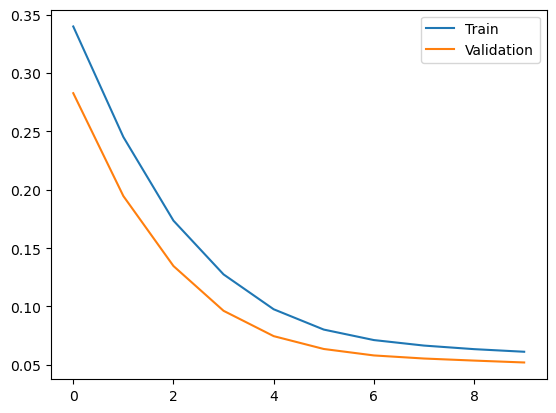

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(labels=['Train','Validation'])